In [241]:
library(ggplot2)
library(dplyr)
library(readxl)
library(lubridate)
library(RColorBrewer)
library(zoo)
library(data.table)
library(lares)
library(psych)

In this homework we were expected to explore the patterns and correlations within Borsa İstanbul Stock data. I have started this assignment with adjusting the data I will work with, such as handling NA values and converting the types of data to the desired class. 

TASK 1. 

To explore the data and its structure I have checked how it looks like with head() function and to have a hint about what I will work with, I have used summary and describe functions. The information collected includes mean values of variables, standard deviations, quantiles, etc. I have also used boxplot to see how the variables differ. You can see in one of the box plots that the variable BAGFS has lots of outliers.

In [242]:
data = read.csv("/home/omery/Desktop/all_ticks_wide.csv")
data <- data.table(data)

In [243]:
head(data)
summary(data)
describe(data[,-1])


timestamp,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,⋯,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012-09-17T06:45:00Z,22.3978,5.2084,1.7102,3.87,1.4683,1.1356,1.0634,6.9909,2.9948,⋯,4.2639,0.96,29.8072,1.0382,3.8620,1.90,0.4172,2.5438,2.2619,0.7789
2012-09-17T07:00:00Z,22.3978,5.1938,1.7066,3.86,1.4574,1.1275,1.0634,6.9259,2.9948,⋯,4.2521,0.96,29.7393,1.0382,3.8529,1.90,0.4229,2.5266,2.2462,0.7789
2012-09-17T07:15:00Z,22.3978,5.2084,1.7102,NA,1.4610,1.1356,1.0679,6.9909,2.9855,⋯,4.2521,0.97,29.6716,1.0463,3.8436,1.91,0.4229,2.5266,2.2566,0.7789
2012-09-17T07:30:00Z,22.3978,5.1938,1.7102,3.86,1.4537,1.1275,1.0679,6.9584,2.9855,⋯,4.2521,0.97,29.7393,1.0382,3.8529,1.91,0.4286,2.5324,2.2619,0.7860
2012-09-17T07:45:00Z,22.5649,5.2084,1.7102,3.87,1.4574,1.1356,1.0725,6.9909,2.9760,⋯,4.2521,0.97,29.8072,1.0382,3.8620,1.90,0.4286,2.5324,2.2619,0.7789
2012-09-17T08:00:00Z,22.5649,5.2229,1.7102,3.86,1.4610,1.1275,1.0725,6.9584,2.9760,⋯,4.2402,NA,29.8072,1.0382,3.8620,1.91,0.4314,2.5381,2.2566,0.7860


  timestamp             AEFES             AKBNK             AKSA        
 Length:50012       Min.   : 0.0001   Min.   :0.0001   Min.   : 0.0001  
 Class :character   1st Qu.:19.1605   1st Qu.:5.8500   1st Qu.: 5.2088  
 Mode  :character   Median :20.6465   Median :6.3057   Median : 6.9853  
                    Mean   :20.9822   Mean   :6.4731   Mean   : 7.1275  
                    3rd Qu.:22.7320   3rd Qu.:6.9325   3rd Qu.: 8.7200  
                    Max.   :28.5090   Max.   :9.2124   Max.   :15.1189  
                    NA's   :1881      NA's   :803      NA's   :1418     
     AKSEN           ALARK            ALBRK           ANACM       
 Min.   :0.000   Min.   :0.0001   Min.   :1.026   Min.   :0.0001  
 1st Qu.:2.670   1st Qu.:1.5689   1st Qu.:1.225   1st Qu.:1.0470  
 Median :2.930   Median :1.9376   Median :1.360   Median :1.2597  
 Mean   :3.183   Mean   :2.0609   Mean   :1.365   Mean   :1.6721  
 3rd Qu.:3.750   3rd Qu.:2.4214   3rd Qu.:1.500   3rd Qu.:2.4021  
 Max.   :5.190

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AEFES,1,48131,20.9822348,2.4940019,20.6465,20.8902296,2.5543715,0.0001,28.5090,28.5089,0.30639719,-0.445841715,0.0113680070
AKBNK,2,49209,6.4731049,0.9449552,6.3057,6.4129707,0.7501956,0.0001,9.2124,9.2123,0.57928816,-0.040032283,0.0042597975
AKSA,3,48594,7.1275044,2.7100334,6.9853,7.1022639,2.6147134,0.0001,15.1189,15.1188,0.16907479,-0.101576158,0.0122937200
AKSEN,4,48171,3.1835424,0.7243322,2.9300,3.1079204,0.5930400,0.0000,5.1900,5.1900,0.82594384,-0.353444182,0.0033002358
ALARK,5,48335,2.0608592,0.5759434,1.9376,2.0094307,0.6053456,0.0001,3.5143,3.5142,0.64569509,-0.533660122,0.0026196841
ALBRK,6,46862,1.3655494,0.1678236,1.3602,1.3616072,0.2002993,1.0255,2.1900,1.1645,0.39112224,0.186678428,0.0007752515
ANACM,7,48165,1.6721016,0.7883650,1.2597,1.5939210,0.5211339,0.0001,3.5021,3.5020,0.71280442,-1.049634576,0.0035922085
ARCLK,8,49045,15.3880879,4.5314591,15.0100,15.3357436,5.4263160,0.0001,26.4278,26.4277,0.11570432,-0.767177034,0.0204616520
ASELS,9,48803,13.4325355,9.6242458,9.2757,12.4374860,7.3465795,0.0001,46.7616,46.7615,0.69722472,-0.917586682,0.0435655745


Warning message in melt.data.table(data[, 2:11]):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”


Warning message:
“Removed 16372 rows containing non-finite values (`stat_boxplot()`).”
Warning message in melt.data.table(data[, 12:21]):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message:
“Removed 15352 rows containing non-finite values (`stat_boxplot()`).”


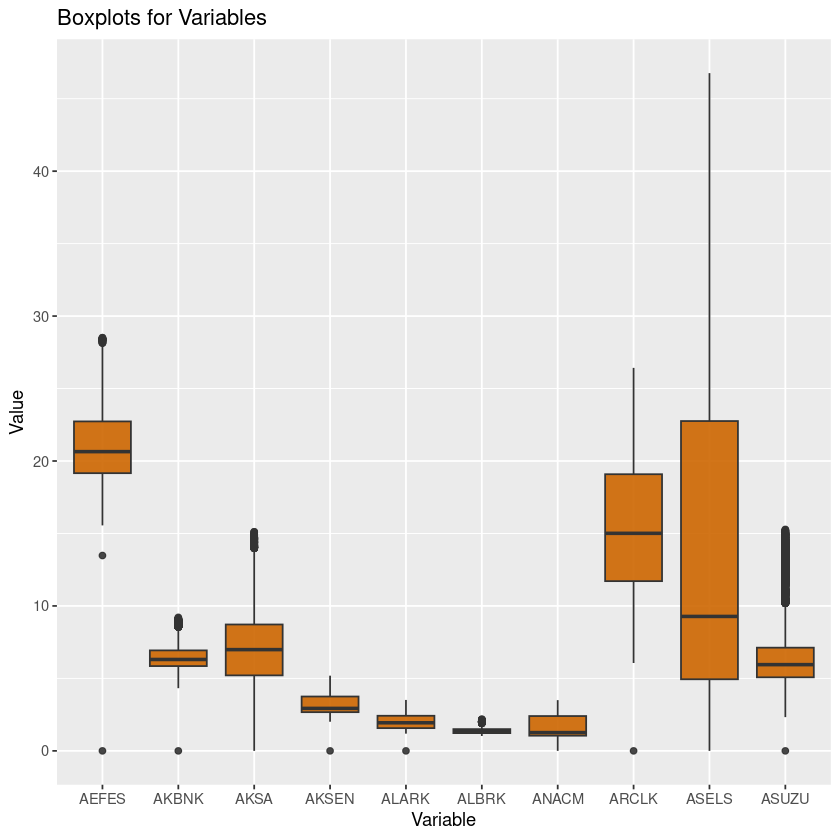

Warning message in melt.data.table(data[, 22:31]):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message:
“Removed 66627 rows containing non-finite values (`stat_boxplot()`).”


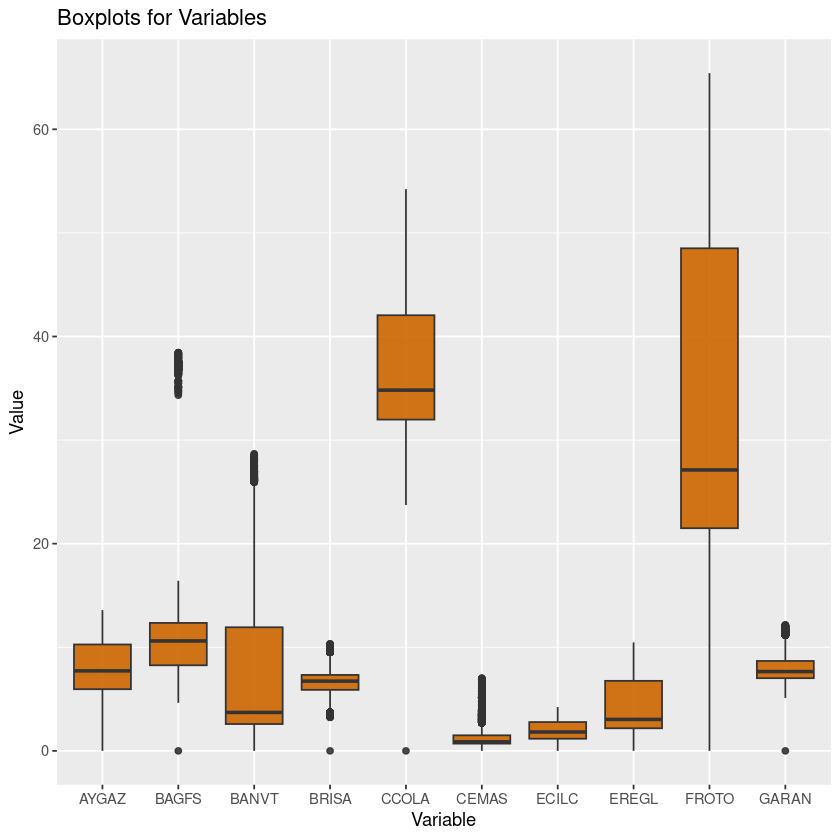

Warning message in melt.data.table(data[, 32:41]):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message:
“Removed 19355 rows containing non-finite values (`stat_boxplot()`).”


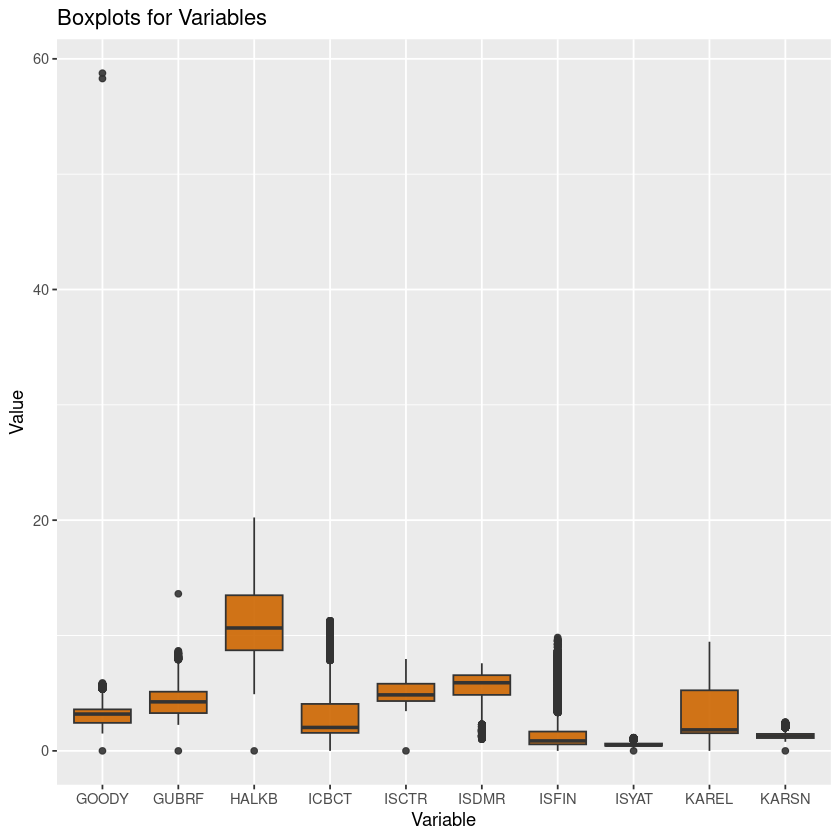

Warning message in melt.data.table(data[, 42:51]):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message:
“Removed 14280 rows containing non-finite values (`stat_boxplot()`).”


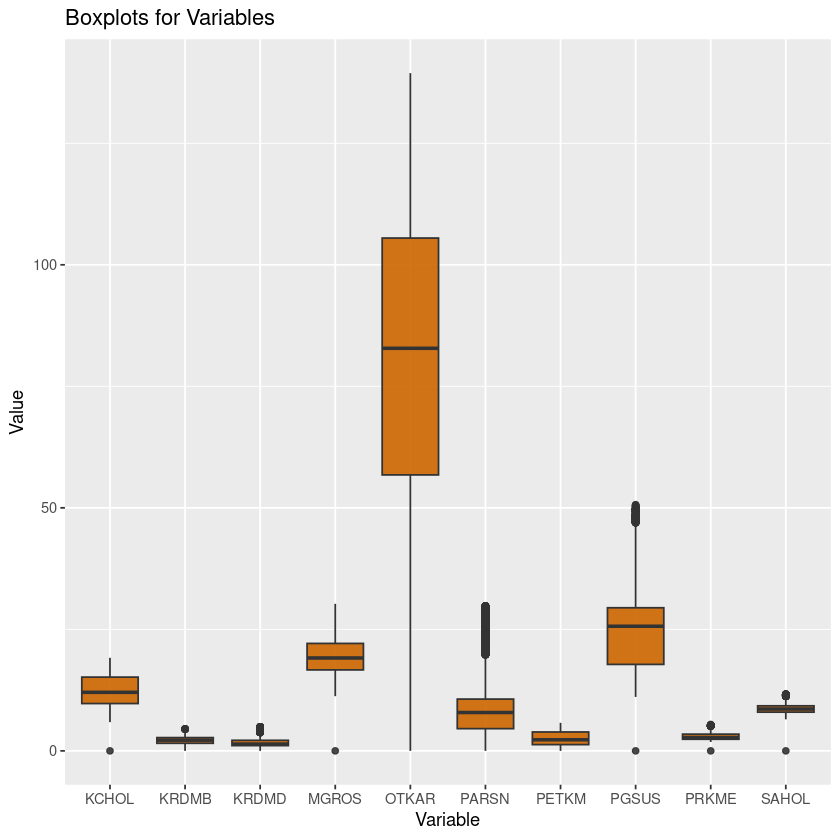

Warning message in melt.data.table(data[, 52:61]):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message:
“Removed 20704 rows containing non-finite values (`stat_boxplot()`).”


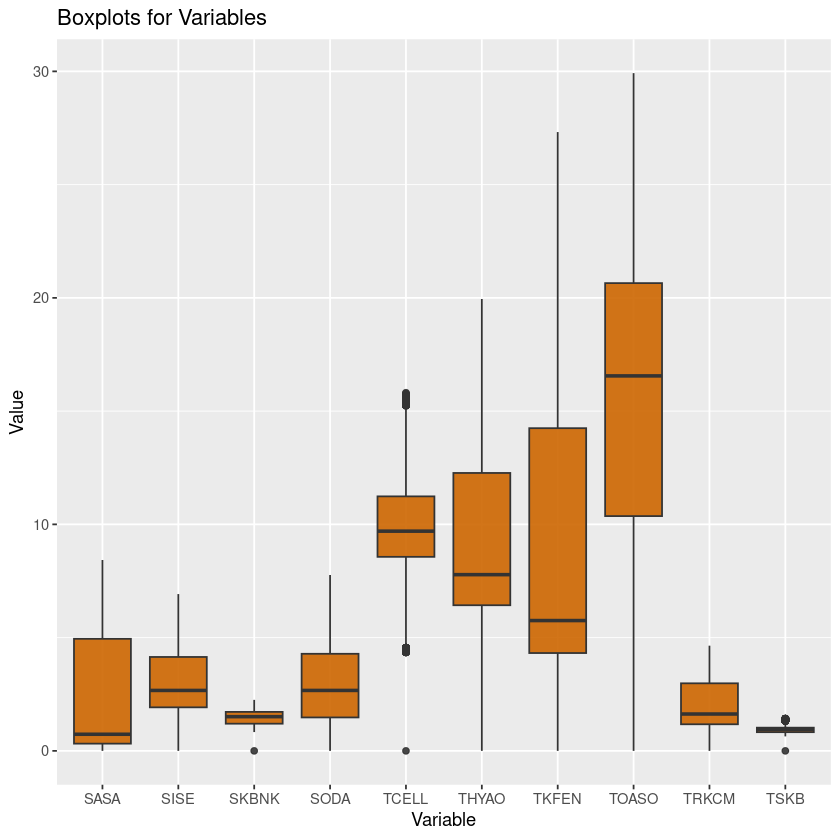

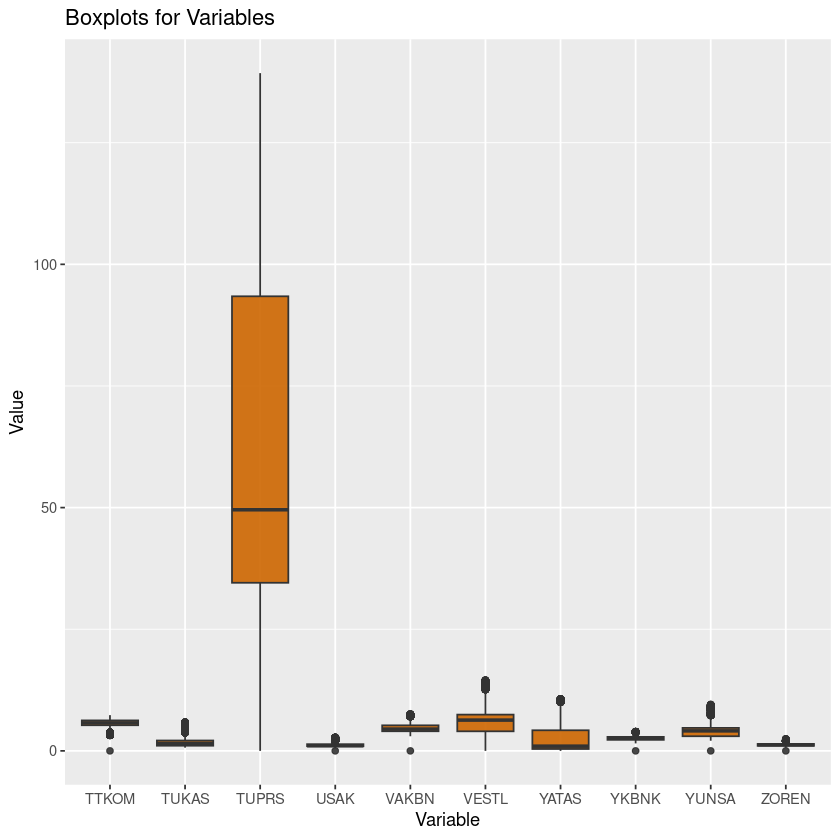

In [244]:
data_long <- melt(data[,2:11])

ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Boxplots for Variables", x = "Variable", y = "Value")

data_long <- melt(data[,12:21])

ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Boxplots for Variables", x = "Variable", y = "Value")


data_long <- melt(data[,22:31])

ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Boxplots for Variables", x = "Variable", y = "Value")


data_long <- melt(data[,32:41])

ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Boxplots for Variables", x = "Variable", y = "Value")


data_long <- melt(data[,42:51])

ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Boxplots for Variables", x = "Variable", y = "Value")

data_long <- melt(data[,52:61])

ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Boxplots for Variables", x = "Variable", y = "Value")

In [245]:
data<-data[,timestamp:=as.POSIXct(timestamp, format = "%Y-%m-%dT%H:%M:%OSZ")]
data <-data %>%
    mutate(across(-c(timestamp), as.numeric))
columns <- colnames(data)[-1] 
for (col in columns) {
  data[, (col) := zoo::na.approx(get(col), na.rm = FALSE)]
} 
data[is.na(data)] <- 0
head(data)
summary(data)

timestamp,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,⋯,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012-09-17 06:45:00,22.3978,5.2084,1.7102,3.87,1.4683,1.1356,1.0634,6.9909,2.9948,⋯,4.2639,0.96,29.8072,1.0382,3.8620,1.90,0.4172,2.5438,2.2619,0.7789
2012-09-17 07:00:00,22.3978,5.1938,1.7066,3.86,1.4574,1.1275,1.0634,6.9259,2.9948,⋯,4.2521,0.96,29.7393,1.0382,3.8529,1.90,0.4229,2.5266,2.2462,0.7789
2012-09-17 07:15:00,22.3978,5.2084,1.7102,3.86,1.4610,1.1356,1.0679,6.9909,2.9855,⋯,4.2521,0.97,29.6716,1.0463,3.8436,1.91,0.4229,2.5266,2.2566,0.7789
2012-09-17 07:30:00,22.3978,5.1938,1.7102,3.86,1.4537,1.1275,1.0679,6.9584,2.9855,⋯,4.2521,0.97,29.7393,1.0382,3.8529,1.91,0.4286,2.5324,2.2619,0.7860
2012-09-17 07:45:00,22.5649,5.2084,1.7102,3.87,1.4574,1.1356,1.0725,6.9909,2.9760,⋯,4.2521,0.97,29.8072,1.0382,3.8620,1.90,0.4286,2.5324,2.2619,0.7789
2012-09-17 08:00:00,22.5649,5.2229,1.7102,3.86,1.4610,1.1275,1.0725,6.9584,2.9760,⋯,4.2402,0.97,29.8072,1.0382,3.8620,1.91,0.4314,2.5381,2.2566,0.7860


   timestamp                          AEFES             AKBNK       
 Min.   :2012-09-17 06:45:00.00   Min.   : 0.0001   Min.   :0.0001  
 1st Qu.:2014-08-12 13:11:15.00   1st Qu.:19.1783   1st Qu.:5.8500  
 Median :2016-05-13 11:22:30.00   Median :20.6710   Median :6.3023  
 Mean   :2016-04-12 22:05:02.75   Mean   :20.9998   Mean   :6.4730  
 3rd Qu.:2017-12-22 11:03:45.00   3rd Qu.:22.7320   3rd Qu.:6.9319  
 Max.   :2019-07-23 15:00:00.00   Max.   :28.5090   Max.   :9.2124  
      AKSA             AKSEN           ALARK            ALBRK      
 Min.   : 0.0001   Min.   :0.000   Min.   :0.0001   Min.   :1.026  
 1st Qu.: 5.1831   1st Qu.:2.680   1st Qu.:1.5692   1st Qu.:1.230  
 Median : 6.9784   Median :2.940   Median :1.9371   Median :1.363  
 Mean   : 7.0990   Mean   :3.199   Mean   :2.0590   Mean   :1.366  
 3rd Qu.: 8.6900   3rd Qu.:3.790   3rd Qu.:2.4095   3rd Qu.:1.501  
 Max.   :15.1189   Max.   :5.190   Max.   :3.5143   Max.   :2.190  
     ANACM            ARCLK             A

In [246]:
cor_matrix <-cor(data[,-1])
cor_matrix

,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,ASUZU,⋯,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
AEFES,1.000000000,0.26517493,-0.01209038,0.52133613,0.31536256,0.503121553,0.10612713,-0.33764221,0.03424075,0.44076060,⋯,0.25614764,-0.225407350,-0.10637247,0.068735648,0.396091442,-0.15750014,0.19463189,0.540580018,0.45801507,0.055059506
AKBNK,0.265174929,1.00000000,0.56741491,0.53118582,0.65616334,0.160331369,0.43833543,0.64314750,0.58139535,0.58467419,⋯,0.57796929,0.312430974,0.38214370,0.784002034,0.942751134,0.48166461,0.59728912,0.516444020,0.08488630,0.619420073
AKSA,-0.012090384,0.56741491,1.00000000,0.21918041,0.62637376,-0.063729002,0.70796859,0.74092025,0.84315639,0.75444073,⋯,0.12689090,0.579107669,0.73213614,0.724239519,0.503089811,0.78072278,0.82270117,-0.178231982,0.40297246,0.693429123
AKSEN,0.521336133,0.53118582,0.21918041,1.00000000,0.44642955,0.285177628,0.43876590,-0.03893237,0.40909780,0.56670127,⋯,0.20793052,-0.109233689,0.20583631,0.560623108,0.594619423,0.09075659,0.42458476,0.385160927,0.37516071,0.338419232
ALARK,0.315362564,0.65616334,0.62637376,0.44642955,1.00000000,0.158137472,0.73477256,0.46112885,0.74497023,0.71820062,⋯,0.07859811,0.483464897,0.65260221,0.650622654,0.651002925,0.50566853,0.78245628,0.157989808,0.37955134,0.381997690
ALBRK,0.503121553,0.16033137,-0.06372900,0.28517763,0.15813747,1.000000000,0.06889346,-0.25302413,-0.06216872,0.31887172,⋯,0.23525374,-0.007659034,-0.02930381,-0.089096652,0.302861049,-0.03366279,0.05137330,0.443255873,0.45510232,0.177911207
ANACM,0.106127133,0.43833543,0.70796859,0.43876590,0.73477256,0.068893464,1.00000000,0.44831760,0.89166184,0.75246171,⋯,-0.30891471,0.594128206,0.92822347,0.558436084,0.344001566,0.74020421,0.88905643,-0.320561078,0.55553602,0.510500740
ARCLK,-0.337642214,0.64314750,0.74092025,-0.03893237,0.46112885,-0.253024131,0.44831760,1.00000000,0.64329723,0.32529051,⋯,0.23520580,0.543099965,0.57127417,0.649176422,0.521500435,0.67908104,0.54290455,-0.122513679,-0.13793154,0.540887103
ASELS,0.034240745,0.58139535,0.84315639,0.40909780,0.74497023,-0.062168715,0.89166184,0.64329723,1.00000000,0.77742099,⋯,-0.12587682,0.533559508,0.89033534,0.759561833,0.488994092,0.74865272,0.92941062,-0.261494237,0.42357731,0.637053019
ASUZU,0.440760600,0.58467419,0.75444073,0.56670127,0.71820062,0.318871720,0.75246171,0.32529051,0.77742099,1.00000000,⋯,0.11072167,0.384545330,0.63644243,0.613717727,0.596320120,0.65648988,0.84664679,0.106373433,0.69766427,0.710556588


Returning only the top 30. You may override with the 'top' argument



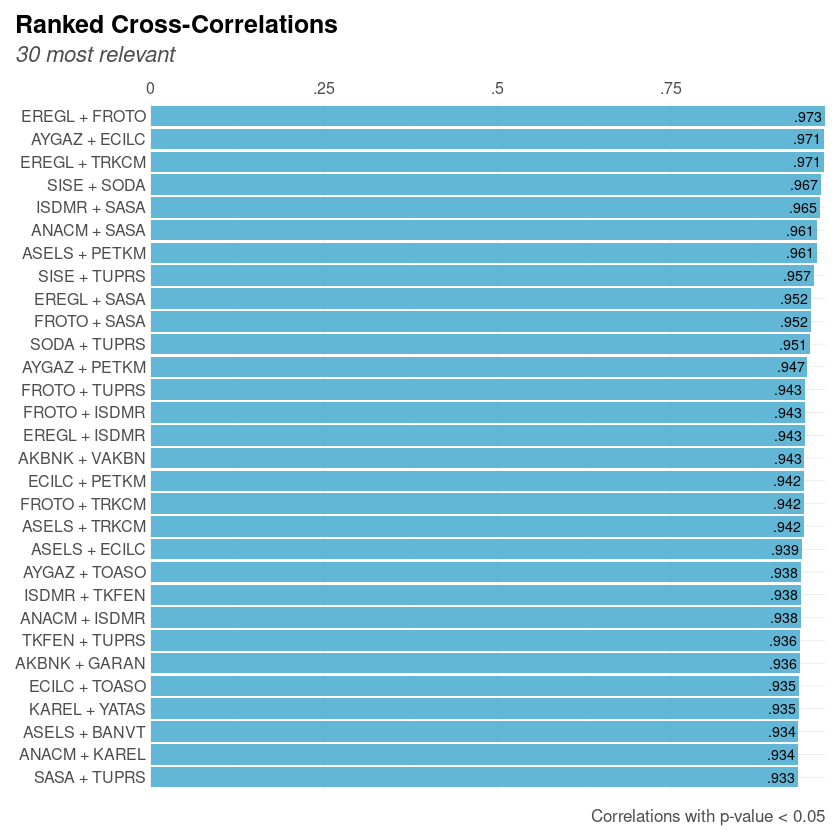

In [247]:


corr_cross(data[,-1], # name of dataset
  max_pvalue = 0.05, # display only significant correlations (at 5% level)
  top = 30 # display top 10 couples of variables (by correlation coefficient)
)


Returning only the top 30. You may override with the 'top' argument



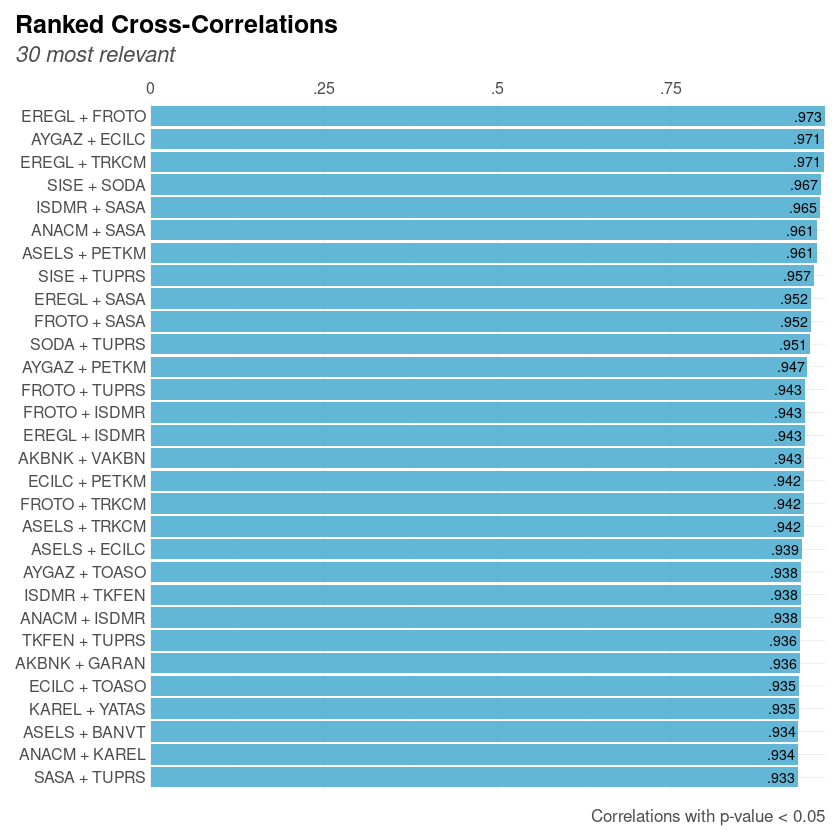

In [248]:
data_deleted_na_rows = read.csv("/home/omery/Desktop/all_ticks_wide.csv")
data_deleted_na_rows <- data.table(data)
data_deleted_na_rows<-data_deleted_na_rows[,timestamp:=as.POSIXct(timestamp, format = "%Y-%m-%dT%H:%M:%OSZ")]
data_deleted_na_rows <-data_deleted_na_rows %>%
    mutate(across(-c(timestamp), as.numeric))
columns <- colnames(data_deleted_na_rows)[-1] 
for (col in columns) {
  data_deleted_na_rows[, (col) := zoo::na.approx(get(col), na.rm = FALSE)]
} 
data_deleted_na_rows <- na.omit(data_deleted_na_rows)
corr_cross(data_deleted_na_rows[,-1], 
  max_pvalue = 0.05, 
  top = 30 
)

In [249]:
data_monthly <- data[, lapply(.SD, mean), by = .(Year = year(timestamp), Month = month(timestamp)), .SDcols = setdiff(names(data), "Date")] 
#AI PROMPT: how do you monthly aggregate data in datatable with multiple columns in r 
#AI PROMPT: what if i have many columns that i can not write all of them like this
data_monthly <- data_monthly[,yearmon:=as.yearmon(timestamp)]
data_monthly <- data_monthly[,-c("timestamp","Year", "Month")]
data_monthly <- data_monthly %>% relocate(yearmon)
head(data_monthly)  


yearmon,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,⋯,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
<yearmon>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Eyl 2012,21.99164,5.123117,1.682897,3.866000,1.419287,1.127077,1.091068,6.575133,2.997942,⋯,4.191144,0.9542115,28.73048,1.046815,3.709997,1.899712,0.4132598,2.498119,2.320530,0.7659915
Eki 2012,22.43734,5.789223,1.694356,3.697964,1.448744,1.106659,1.150472,6.661405,3.165903,⋯,5.483872,0.9224802,28.36237,1.197415,3.709942,1.822283,0.3445222,2.573235,2.554684,0.7409903
Kas 2012,21.61255,6.053151,1.730945,3.574336,1.487164,1.202658,1.209556,7.061469,3.155719,⋯,5.201549,0.9046678,30.14557,1.132343,3.984920,1.786023,0.3376123,2.670650,2.766322,0.7355178
Ara 2012,21.53539,6.349386,1.836540,4.074678,1.667150,1.370881,1.241810,7.238860,3.610114,⋯,5.372824,0.9300645,33.89526,1.127954,4.297170,1.868812,0.3401774,2.966750,2.708658,0.7732744
Oca 2013,22.27797,6.776285,1.959172,4.631259,1.942934,1.535008,1.358489,7.907567,3.921994,⋯,5.784855,0.9534965,34.74886,1.146736,4.914509,2.025699,0.3434133,3.194934,2.620967,1.0083811
Şub 2013,21.69247,6.307122,1.883442,4.717356,1.912069,1.504159,1.249493,7.221103,4.461735,⋯,5.714688,0.8808750,33.59116,1.073808,4.941411,1.883663,0.3214956,2.944415,2.613303,1.0047134


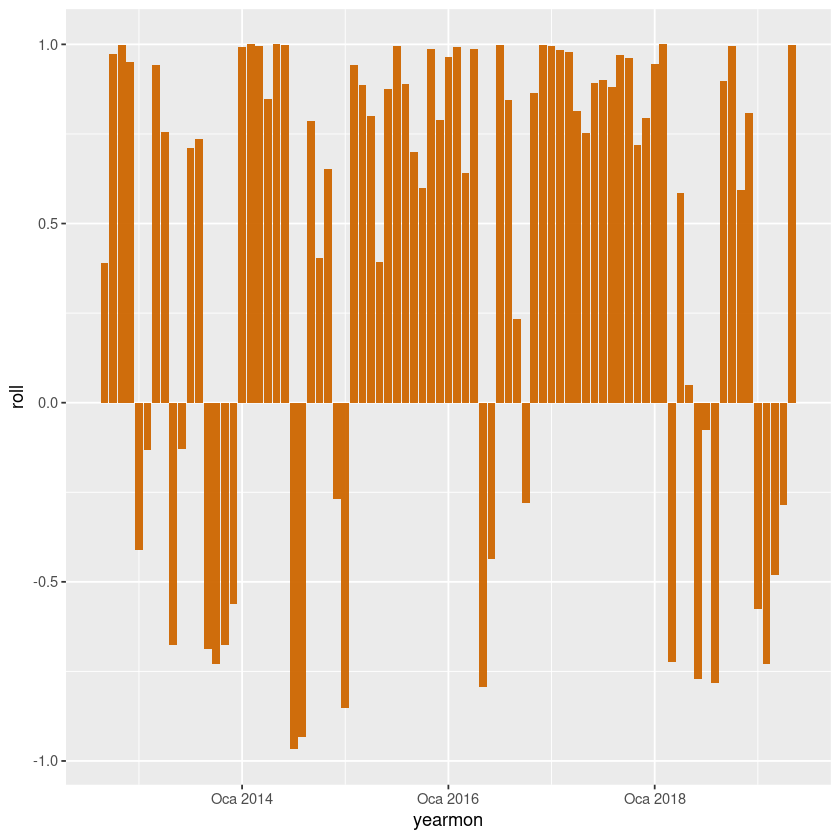

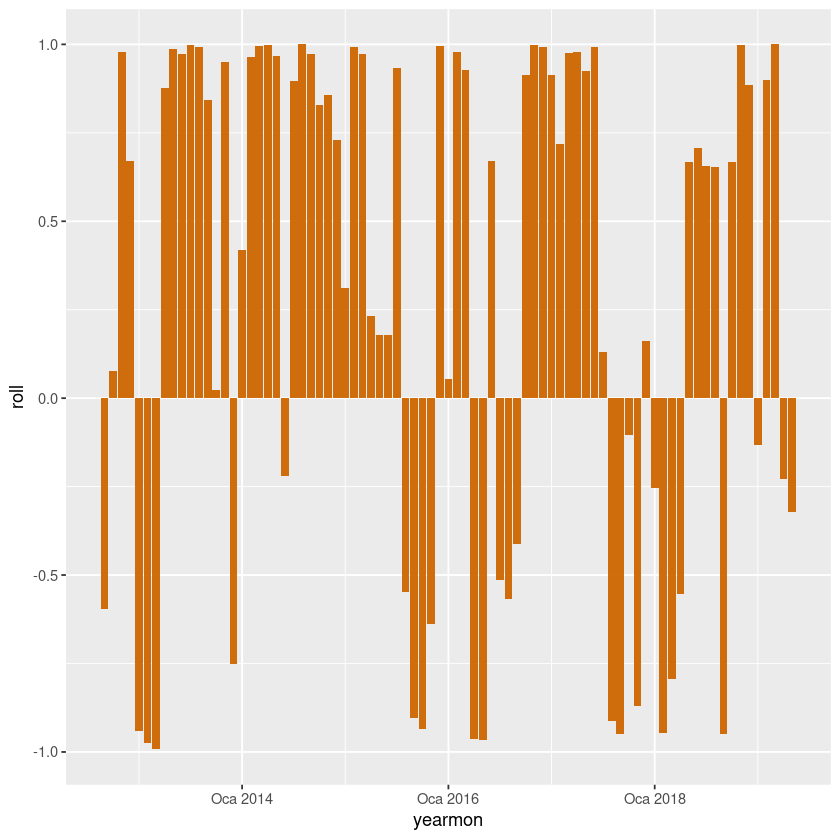

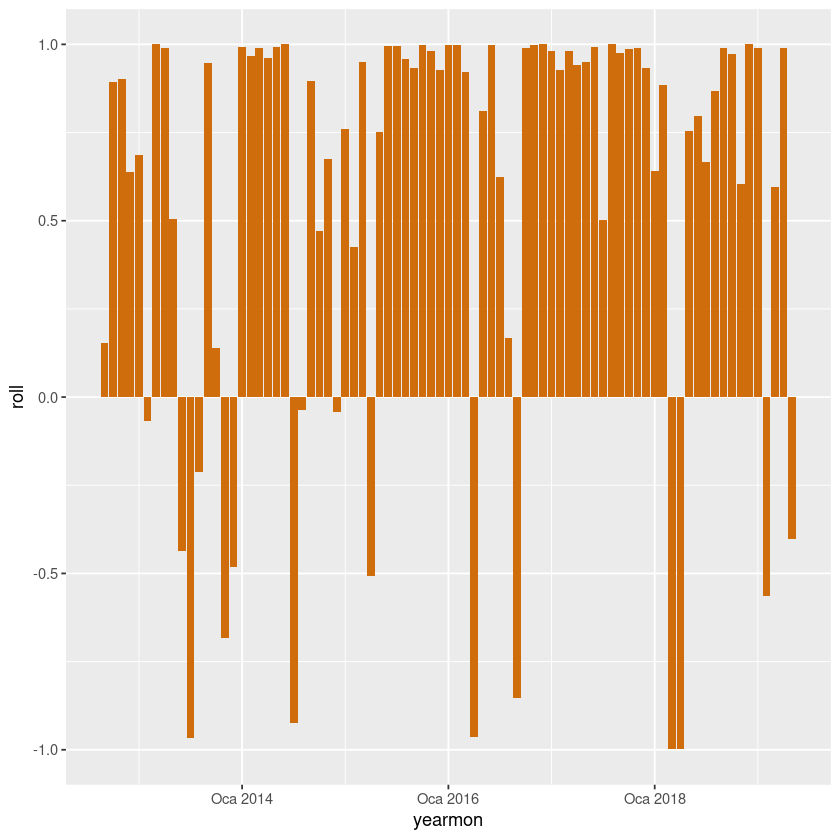

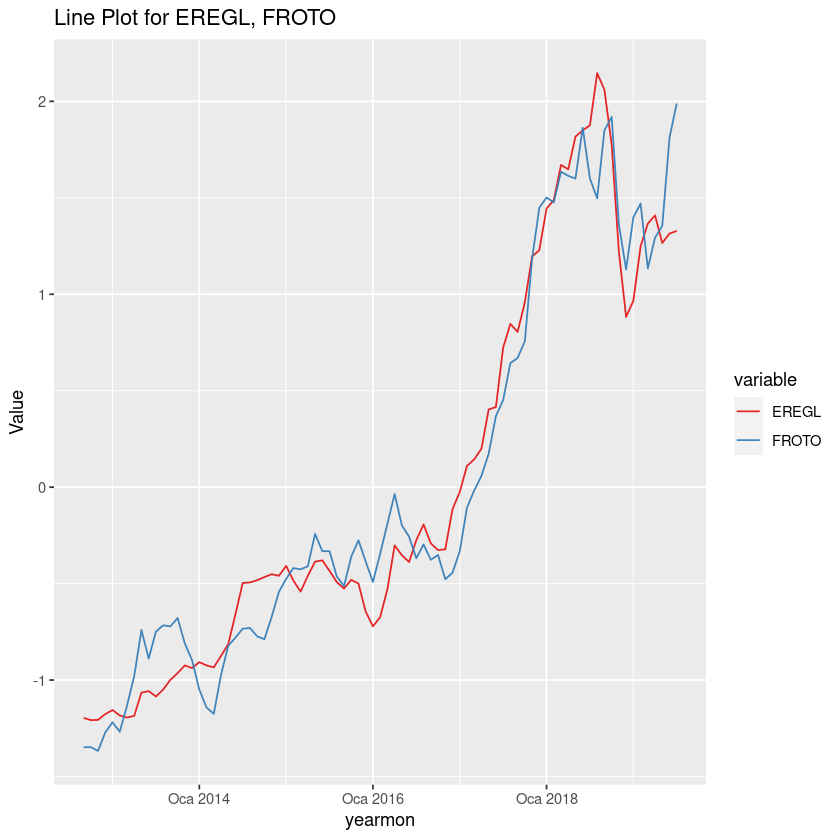

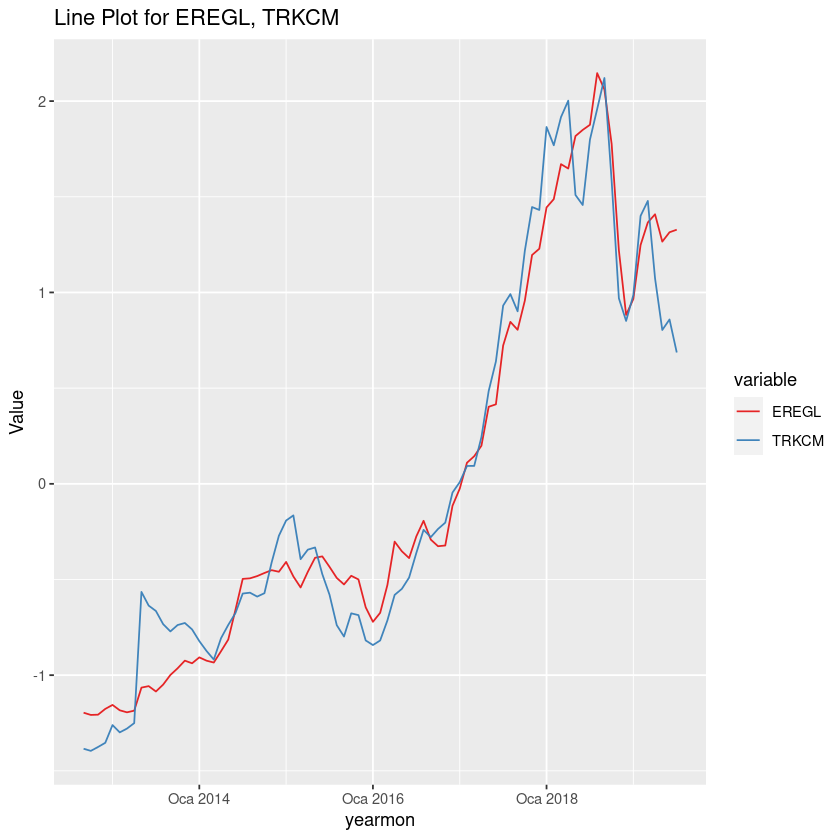

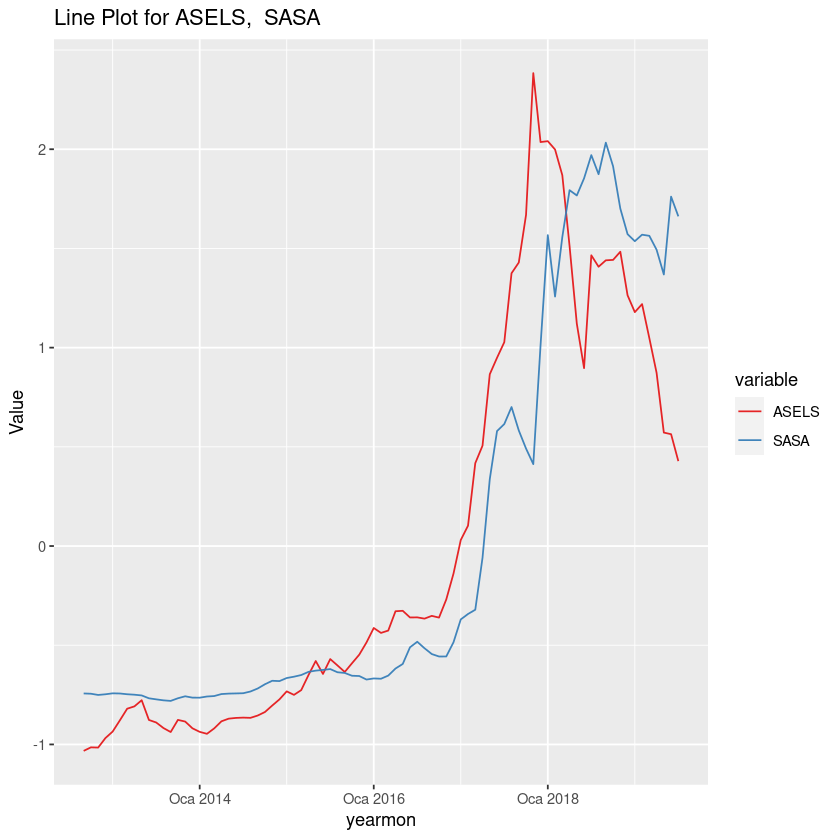

In [250]:

roll1 <- rollapply(data_monthly[,-1], width=3, function(x) cor(x[,"EREGL"],x[,"FROTO"]), by.column=FALSE)

roll2 <- rollapply(data_monthly[,-1], width=3, function(x) cor(x[,"ASELS"],x[,"SASA"]), by.column=FALSE)

roll3 <- rollapply(data_monthly[,-1], width=3, function(x) cor(x[,"EREGL"],x[,"TRKCM"]), by.column=FALSE)

data_monthly_short <- head(data_monthly, length(roll1))
data_monthly_temp1 <- data_monthly_short[,roll:=roll1]
ggplot(data=data_monthly_temp1, aes(x=yearmon, y=roll)) +
  geom_bar(stat="identity")
data_monthly_temp2 <- data_monthly_short[,roll:=roll2]
ggplot(data=data_monthly_temp2, aes(x=yearmon, y=roll)) +
  geom_bar(stat="identity")
data_monthly_temp3 <- data_monthly_short[,roll:=roll3]
ggplot(data=data_monthly_temp3, aes(x=yearmon, y=roll)) +
  geom_bar(stat="identity")

data_monthly1 <- data_monthly %>% mutate_at(c("EREGL", "FROTO"), ~(scale(.) %>% as.vector))
data_long1 <- melt(data_monthly1[,c("yearmon","EREGL","FROTO")], id.vars = "yearmon")
ggplot(data_long1, aes(x = yearmon, y = value, color = variable)) +
  geom_line() +
  labs(title = "Line Plot for EREGL, FROTO", x = "yearmon", y = "Value") +
  scale_color_brewer(palette = "Set1")   


data_monthly2 <- data_monthly %>% mutate_at(c("EREGL", "TRKCM"), ~(scale(.) %>% as.vector))
data_long2 <- melt(data_monthly2[,c("yearmon","EREGL","TRKCM")], id.vars = "yearmon")
ggplot(data_long2, aes(x = yearmon, y = value, color = variable)) +
  geom_line() +
  labs(title = "Line Plot for EREGL, TRKCM", x = "yearmon", y = "Value") +
  scale_color_brewer(palette = "Set1")   


data_monthly3 <- data_monthly %>% mutate_at(c("ASELS", "SASA"), ~(scale(.) %>% as.vector))
data_long3 <- melt(data_monthly3[,c("yearmon","ASELS","SASA")], id.vars = "yearmon")
ggplot(data_long3, aes(x = yearmon, y = value, color = variable)) +
  geom_line() +
  labs(title = "Line Plot for ASELS,  SASA", x = "yearmon", y = "Value") +
  scale_color_brewer(palette = "Set1")   




TASK 3. 

I have applied PCA to our data and find out that 3 components can cover almost 80 percent of the variance. Below you can see how it is calculated.

In [251]:
pca_obj = princomp(data[,-1],cor=T)
summary(pca_obj,loadings=T)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4    Comp.5
Standard deviation     5.5399551 3.2079269 2.4529313 1.83510481 1.5017389
Proportion of Variance 0.5115184 0.1715132 0.1002812 0.05612683 0.0375870
Cumulative Proportion  0.5115184 0.6830316 0.7833128 0.83943965 0.8770266
                           Comp.6     Comp.7     Comp.8      Comp.9     Comp.10
Standard deviation     1.20412325 0.91871480 0.79734115 0.712632366 0.692589899
Proportion of Variance 0.02416521 0.01406728 0.01059588 0.008464081 0.007994679
Cumulative Proportion  0.90119186 0.91525914 0.92585502 0.934319105 0.942313785
                           Comp.11     Comp.12     Comp.13   Comp.14
Standard deviation     0.682148709 0.588968482 0.558078065 0.5359851
Proportion of Variance 0.007755448 0.005781398 0.005190852 0.0047880
Cumulative Proportion  0.950069232 0.955850630 0.961041482 0.9658295
                           Comp.15     Comp.16     Comp.17     Comp.18
Standard de

First Component:  AKBNK * 0.109 + AKSA  * 0.160 + ALARK * 0.135 .....
Second Component: AEFES * 0.165 +AKBNK  * 0.216 + AKSEN * 0.164 .....

Latent Variables are when we can label those components in some categories, for example if one component includes AKBNK, ALBRK, GARAN etc. which are all banks we could name that component as the bank component. Or maybe some component includes 2 different holding companies' stock prices A and B, we could name that component A/B index. 

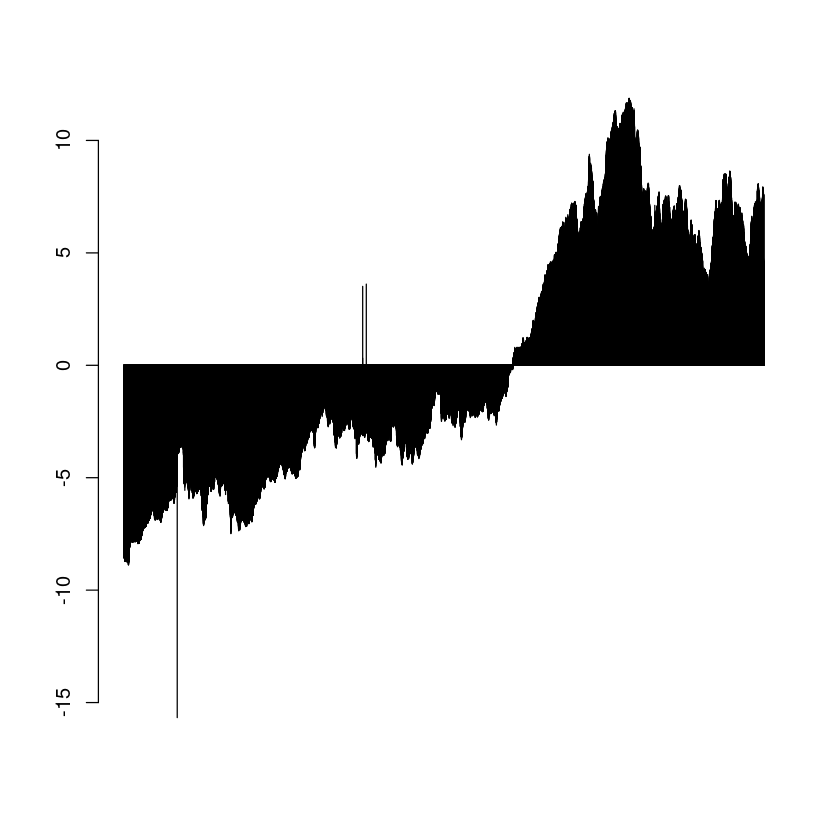

In [252]:
barplot(pca_obj$scores[,1]) 

TASK 4. 

Results of comparing SISE stock price with the data of google trends searches of "ŞİŞECAM" and "IST:SISE". I wanted to see how the data changes with the google trends so I also tried taking the derivative of the SISE stock prices. 

In [253]:
sise <- data_monthly[,c("yearmon", "SISE")]
sise <- tail(sise, 82)


trends_sisecam = read.csv("/home/omery/Desktop/sisecam.csv")
trends_sisecam <- data.table(trends_sisecam)
trends_istsise = read.csv("/home/omery/Desktop/istsise.csv")
trends_istsise <- data.table(trends_istsise)

sise <- sise[,sisecam:=trends_sisecam[,2]]
sise <- sise[,istsise:=trends_istsise[,2]]

head(sise)
tail(sise)


yearmon,SISE,sisecam,istsise
<yearmon>,<dbl>,<int>,<int>
Eki 2012,0.9270773,67,0
Kas 2012,0.9473449,80,0
Ara 2012,1.0382397,82,0
Oca 2013,1.1820932,91,93
Şub 2013,1.0992950,64,0
Mar 2013,1.0876487,62,0


yearmon,SISE,sisecam,istsise
<yearmon>,<dbl>,<int>,<int>
Şub 2019,6.333075,82,0
Mar 2019,6.142054,66,0
Nis 2019,5.689123,59,0
May 2019,5.274828,71,32
Haz 2019,5.157543,63,0
Tem 2019,4.691543,73,50


,SISE,sisecam,istsise
SISE,1.0000000,0.373883311,-0.155066500
sisecam,0.3738833,1.000000000,-0.000680745
istsise,-0.1550665,-0.000680745,1.000000000


,SISE,sisecam,istsise
SISE,1.000000000,0.002731158,0.033820338
sisecam,0.002731158,1.000000000,-0.000680745
istsise,0.033820338,-0.000680745,1.000000000


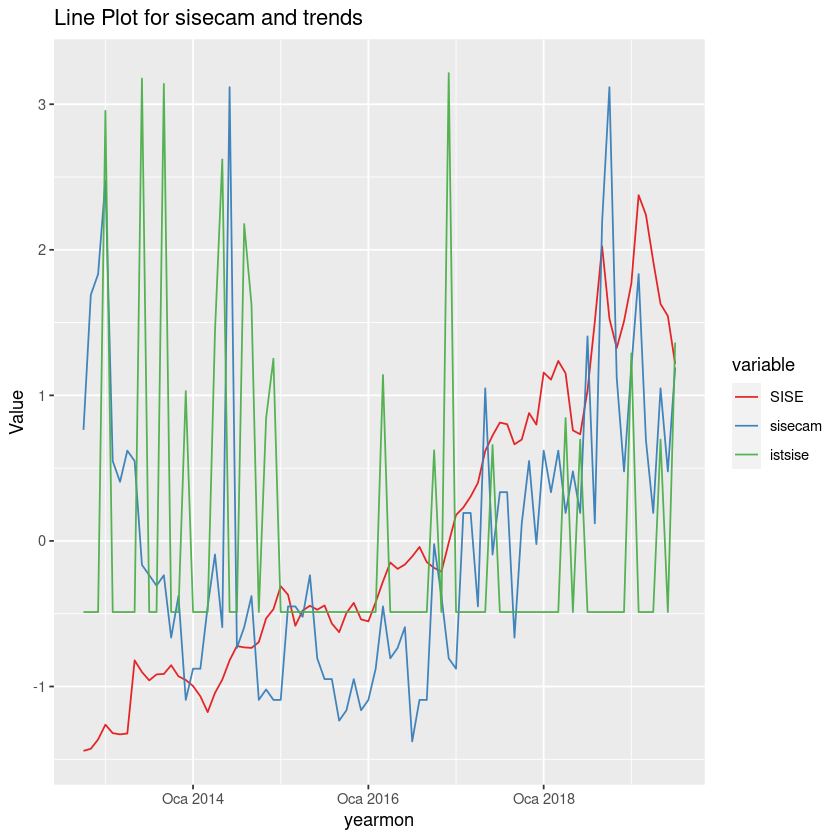

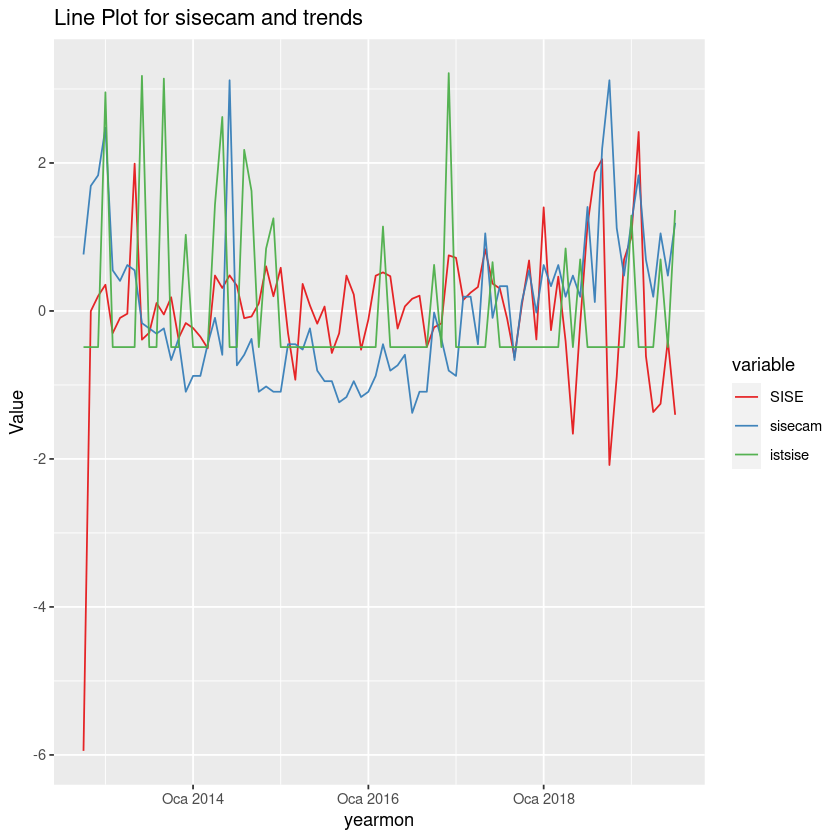

In [254]:
cor_matrix <-cor(sise[,-1])
cor_matrix

sise <- sise %>% mutate_at(c("SISE", "sisecam","istsise"), ~(scale(.) %>% as.vector))
data_long_sise <- melt(sise, id.vars = "yearmon")
ggplot(data_long_sise, aes(x = yearmon, y = value, color = variable)) +
  geom_line() +
  labs(title = "Line Plot for sisecam and trends", x = "yearmon", y = "Value") +
  scale_color_brewer(palette = "Set1")   


#Now with the derivative of SISE stock prices
sisenext=head(c(0,sise$SISE), nrow(sise))
sise <- sise[,SISE:=sise$SISE-sisenext]

cor_matrix <-cor(sise[,-1])
cor_matrix

sise <- sise %>% mutate_at(c("SISE", "sisecam","istsise"), ~(scale(.) %>% as.vector))
data_long_sise <- melt(sise, id.vars = "yearmon")
ggplot(data_long_sise, aes(x = yearmon, y = value, color = variable)) +
  geom_line() +
  labs(title = "Line Plot for sisecam and trends", x = "yearmon", y = "Value") +
  scale_color_brewer(palette = "Set1")   